# Document Similarity (English)

In this notebook, you will use the DocumentSimilarity tool to identify similar documents in the English language and decide whether to keep or remove them from the corpus.  

**Note:** this tool uses [MinHash](https://ekzhu.com/datasketch/minhash.html) to estimate the Jaccard similarity between sets of documents. MinHash is introduced by Andrei Z. Broder in this [paper](https://cs.brown.edu/courses/cs253/papers/nearduplicate.pdf).

<div class="alert alert-block alert-warning">
<b>User guide to using a Jupyter Notebook</b> 

If you are new to Jupyter Notebook, feel free to take a quick look at [this user guide](https://github.com/Australian-Text-Analytics-Platform/semantic-tagger/blob/main/documents/jupyter-notebook-guide.pdf) for basic information on how to use a notebook.
</div>

## 1. Setup
Before you begin, you need to import the DocumentSimilarity package and the necessary libraries and initiate them to run in this notebook.

In [1]:
# import the DocumentSimilarity tool
print('Loading DocumentSimilarity...')
from document_similarity import DocumentSimilarity, DownloadFileLink
import sys

# initialize the DocumentSimilarity
ds = DocumentSimilarity()
print('Finished loading.')

Loading DocumentSimilarity...


Loading BokehJS ...

Finished loading.


## 2. Load the data
This notebook will allow you to upload text data in a text file (or a number of text files). Alternatively, you can also upload text inside a text column inside your excel spreadsheet ([see an example here](https://github.com/Sydney-Informatics-Hub/HASS-29_Quotation_Tool/blob/main/documents/sample_texts.xlsx)).  

<table style='margin-left: 10px'><tr>
<td> <img src='./img/txt_icon.png' style='width: 45px'/> </td>
<td> <img src='./img/xlsx_icon.png' style='width: 55px'/> </td>
<td> <img src='./img/csv_icon.png' style='width: 45px'/> </td>
<td> <img src='./img/zip_icon.png' style='width: 45px'/> </td>
</tr></table>

<div class="alert alert-block alert-warning">
<b>Uploading your text files</b> 
    
If you have a large number of text files (more than 10MB in total), we suggest you compress (zip) them and upload the zip file instead. If you need assistance on how to compress your file, please check [the user guide](https://github.com/Australian-Text-Analytics-Platform/semantic-tagger/blob/main/documents/jupyter-notebook-guide.pdf) for more info. 
</div>

<div class="alert alert-block alert-danger">
<b>Large file upload</b> 
    
If you have ongoing issues with the file upload, please re-launch the notebook via Binder again. If the issue persists, consider restarting your computer.
</div>

In [2]:
# upload the text files and/or excel spreadsheets onto the system
display(ds.upload_box)
print('Uploading large files may take a while. Please be patient.')
print('\033[1mPlease wait and do not press any buttons until the progress bar appears...\033[0m')

Uploading large files may take a while. Please be patient.
Please wait and do not press any buttons until the progress bar appears...


In [3]:
# display uploaded text
n=5

ds.text_df.head(n)

,text_name,text,text_id
0,V15N004,"?<text_id=""V15N004"">\nMEMO FOR MUMS TO BE Get ...",5dd1036268
1,H15N015,"?<text_id=""H15N015"">\nPregnancy and diabetes l...",9f46c903c3
2,D17N010,"?<text_id=""D17N010"">\nA cup of cheer for diabe...",21bca9c004
3,H15N001,"?<text_id=""H15N001"">\nDiabetes raises risk of ...",051a1333c0
4,D17N004,"?<text_id=""D17N004"">\nApple 's sweet on fighti...",ca9df0dd97


## 3. Calculate Document Similarity
Once your texts have been uploaded, you can begin to calculate the similarity between documents in the corpus. 

<div class="alert alert-block alert-info">
<b>Tools:</b>    

- MinHash: fast implementation of estimating Jaccard similarity between documents in the corpus.  
- Gensim: to tokenize the text.  
    
<b>Note:</b> in general, Gensim splits the text whenever whitespace or punctuation is encountered and digits are excluded, e.g., the text "Here's to victory no 2" will be tokenized into five tokens: "Here", "s", "to", "victory" and "no". For more information, please visit [this page](https://radimrehurek.com/gensim/utils.html#gensim.utils.tokenize).
</div>

<div class="alert alert-block alert-danger">
<b>Memory limitation in Binder</b> 
    
The free Binder deployment is only guaranteed a maximum of 2GB memory. Processing very large text files may cause the session (kernel) to re-start due to insufficient memory. Check [the user guide](https://github.com/Australian-Text-Analytics-Platform/semantic-tagger/blob/main/documents/jupyter-notebook-guide.pdf) for more info. 
</div>

<div class="alert alert-block alert-warning">
<b>Parameters for calculating similarity</b> 
    
The DocumentSimilarity tool uses Jaccard similarity to measure the similarity between documents. In the code below, we have specified and explained the default parameters for calculating the Jaccard similarity. However, you can also change these parameters should you wish. 
</div>

In [3]:
# USER SPECIFIES THESE VARIABLES
# set the n-gram size (the number of words used to detect similarity), 
# e.g., n-gram=1 means compare every word ('apple' and 'orange'), 
# n-gram=2 means compare every pair of words ('one apple' and 'two oranges'), etc.
ngram_value = 1

# select whether to calculate actual or estimated Jaccard similarity 
# to measure the similarity between documents 
# we recommend using estimated Jaccard similarity for large corpus of documents (faster)
actual_jaccard = False # True or False

# whether to exclude punctuations when calculating Jaccard similarity
ds.exclude_punc = False # True or False

# set the number of permutation functions (num_perm) parameter for estimating Jaccard similarity
# higher permutation functions improves the accuracy, but also increases query cost
num_perm = 256

# anything with >= the cutoff will be identified as similar documents
similarity_cutoff = 0.5 # value should be between 0-1

In [4]:
# begin the process of calculating similarity and identify similar documents
ds.calculate_similarity(ngram_value, num_perm, similarity_cutoff, actual_jaccard)

Step 9/9: 100%|████████████████████████████████████████████████████████████████████| 242/242 [00:00<00:00, 43399.25it/s]

160 pair of similar documents found in the corpus.


## 3. Analyse similar documents
Once the tool has finished calculating the document similarity, you can begin to analyse the outcome.  

The graph below is a histogram of the count of similar documents in the corpus as measured by their Jaccard similarity. In this histogram, you can identify how many documents are found at different level of similarity measures.

<div class="alert alert-block alert-warning">
<b>Histogram of similar documents</b> 
    
The x-axis on the histogram shows the Jaccard similarity scores for every document in the corpus, and the y-axis (the height of the bar) tells us how many similar documents are found at those Jaccard similarity score ranges. 
</div>

<Axes: title={'center': 'Similarity count accross the entire corpus'}, xlabel='Jaccard similarity score', ylabel='No. of similar documents'>

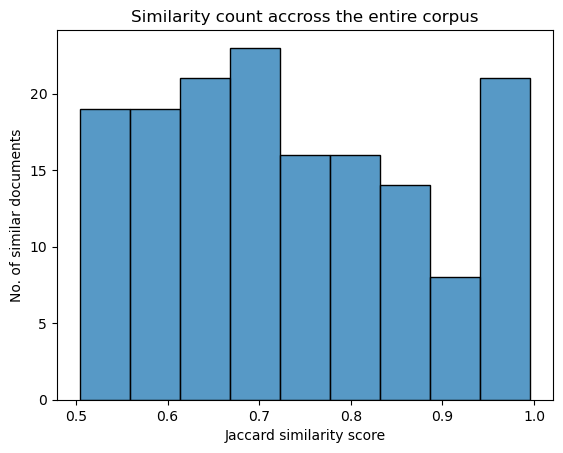

In [5]:
# plot the similarity count accross the entire corpus
ds.plot_hash_similarity_by_source(ds.deduplication_df)

<div class="alert alert-block alert-warning">
<b>Heatmap of similar documents</b> 
    
The below heatmap shows the Jaccard similarity scores between pair of similar documents, with the x- and y-axes showing the text_id of the similar document pairs (you can hover over the similar nodes to display the text name pairs). Please note that the heatmap only displays pair of similar documents with scores above the similarity cut-off, as defined earlier.  
</div>  

<div class="alert alert-block alert-danger">
<b>Large number of similar documents</b> 
    
You can resize the heatmap, adjust the font size or the font color to better visualize your data by specifying the below parameters. You can also zoom in/out of the heatmap, move it around, save and download it to your local computer using the interactive tool on the right hand-side of the heatmap.  

<b>Note:</b> visualizing a large number of similar document pairs (>500) may slow down the notebook.   
</div>

In [6]:
# define the plot width, height, font size and color
plot_width = 900 # increase plot width if necessary
plot_height = 800 # increase plot height if necessary
font_size = '14px'
text_color = 'white' # 'black' or 'white' would usually work for most scenarios

print('\033[1mVisualizing a large number of similar document pairs (>500) may slow down the notebook.\033[0m')
print('There are \033[1m{}\033[0m document pairs in the current process'.format(ds.deduplication_df.shape[0]))
plot_heatmap_size = input("Enter a number to proceed with the first N pairs, 'y + Enter' to proceed full and 'n + Enter' to cancel:")

if plot_heatmap_size.lower()!='n':
    if plot_heatmap_size.isnumeric():
        size = int(plot_heatmap_size)
    if plot_heatmap_size.lower()=='y':
        size = sys.maxsize

    # plot heatmap of Jaccard similarity
    ds.plot_heatmap_similarity(similarity_cutoff,
                                    plot_width,
                                    plot_height,
                                    font_size,
                                    text_color,
                                    size)

Visualizing a large number of similar document pairs (>500) may slow down the notebook.
There are 160 document pairs in the current process


Enter a number to proceed with the first N pairs, 'y + Enter' to proceed full and 'n + Enter' to cancel: y



You can hover over the similar nodes to display the text name pairs.



<div class="alert alert-block alert-warning">
<b>Analyse similar documents</b> 

Below you can generate a list of similar documents (in pairs) found by the tool, based on the similarity cutoff specified earlier. By default, the tool makes recommendations on whether to 'keep' or 'remove' each similar document (the tool will recommend to remove the document with the lower word count, if the Jaccard similarity is above the specified threshold). However, using the below tool, you can generate each pair of similar documents (by specifying the row index you wish to analyse), analyse them, and update the action/recommendation as you see fit.
</div>

<div class="alert alert-block alert-danger">
<b>Similar documents table</b> 

The table below displays only those texts identified as similar based on the Jaccard similarity cut-off selected earlier and the number of texts included in the table display therefore also informs you how many texts in your corpus are identified as within the cut-off threshold.
</div>

In [5]:
ds.display_deduplication_text()

<div class="alert alert-block alert-warning">
<b>What information is included in the above table?</b> 

**text_id1/2:** the text id of the pair of similar documents.
    
**text_name1/2:** the text name of the pair of similar documents.
   
**word_count1/2:** the word count of the pair of similar documents.

**status1/2:** whether to 'keep' or 'remove' each similar document.

**similarity:** the Jaccard similarity between the pair of similar documents.
</div>

## 5. Save duplicated/non-duplicated texts
Once you are happy with the list of texts that you want to keep, you can run the below code to save the non-duplicated texts (those with 'keep' status) or the duplicated ones (those with 'remove' status) into a zip of text (.txt) files and download them to your local computer.

In [ ]:
n=5

ds.finalise_and_save(n)